In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.describe(include= object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Finding Numerical and Categorical columns

In [8]:
df.select_dtypes(include='number').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.select_dtypes(include = ['object', 'category']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### Data Cleaning

In [11]:
### Check and treat null values
### Check duplicate rows and delete them

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df.duplicated().sum()

0

### Checking Outliers

In [15]:
numeric_cols = ['Age', 'DistanceFromHome','MonthlyIncome','TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole']

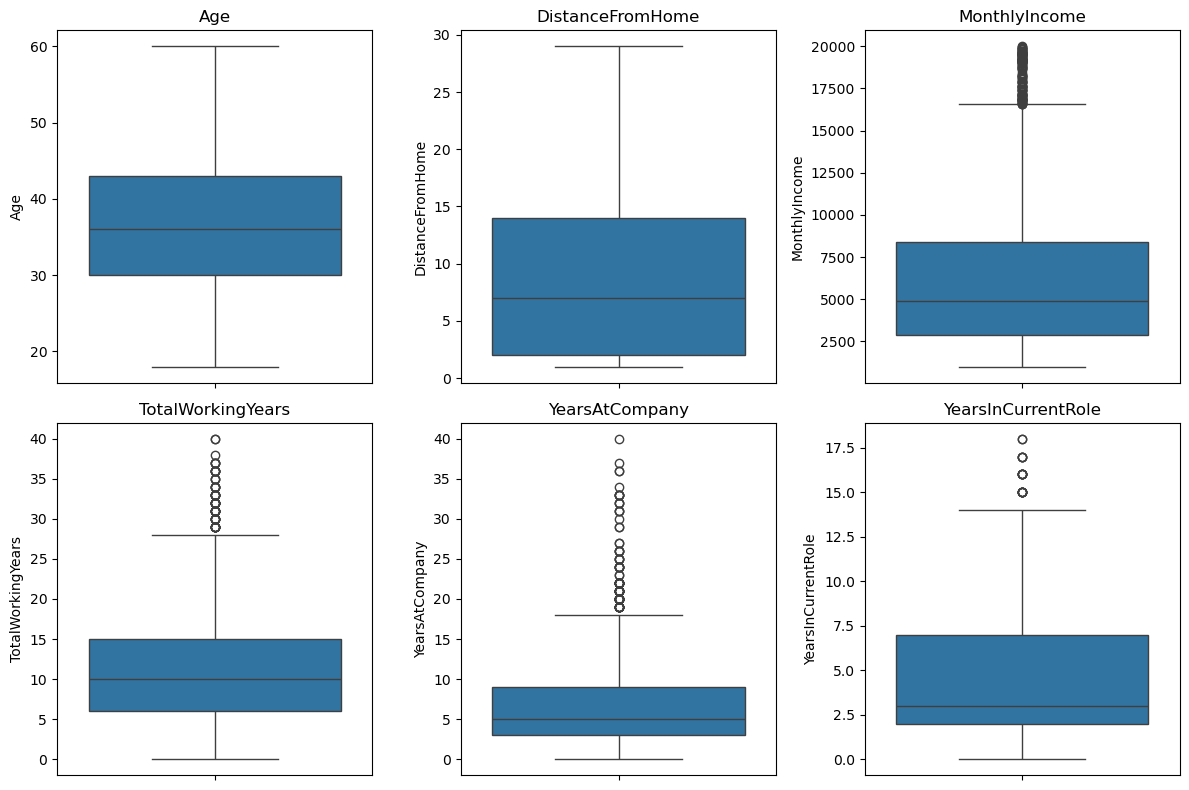

In [16]:
plt.figure(figsize=(12,8))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col])         
    plt.title(col)
plt.tight_layout()


## We do not remove outliers in this dataset because:

### They represent real business variation

###Removing them could reduce model insight

In [18]:
## Interpretation.

## MonthlyIncome

# We see some very high income values (around 17,000–20,000).
# These show up as outlier dots because most employees earn 3,000–8,000
# But these are:Senior managers,Directors,Highly experienced employees

#So the outliers are not wrong, they are high salary roles and so we dont treat them and keep them as it is.


## TotalWorkingYears 

# Median is around 10 years total experience.
# Most employees fall between 5 and 15 years.
# A bunch of points above ~28–40 → Outliers.
# We dont remove them because these are likely senior employees who have worked long careers.

## YearsAtCompany 
# Median is around 4–5 years in the current company.
# Many employees are new (0–3 years).
# A few employees have been at the company for 20–40 years 
# We donot remove them as In many companies, some people stay very long, especially in administrative/management roles.


## YearsInCurrentRole 

# Most employees have spent 2–4 years in their current role.
# A few employees show 15–18 years in the same role.
# We donot remove them as Some employees keep the same position for a long time (especially stable roles).

### Handle Categorical variables(Label Encoding/One-hot Encoding)

In [20]:
# To find yes/no columns

In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
[i for i in df.columns if df[i].isin(['Yes','No']).any()]

#.isin(['Yes', 'No']) → Checks each value
#.any() → Tells if at least one Yes/No exists in the column

['Attrition', 'OverTime']

In [23]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [24]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df['OverTime'] = df['OverTime'].map({'Yes':1 , 'No':0})

In [26]:
df['OverTime'].unique()

array([1, 0], dtype=int64)

### Creating Groups: 
### Age: Age_Group , DistanceFromHome: Distance_Band , MonthlyIncome: Monthly_Salary_Band , YearsAtCompany : Years_At_Company , 
### YearsSinceLastPromotion : Promotion_Band , PercentSalaryHike : Salary_Hike  


In [28]:
df['Age'].min()

18

In [29]:
df['Age'].max()

60

In [30]:
df['Age_Group'] = pd.cut(df['Age'],
                         bins = [18,25,35,45,60],
                         labels = ['18-25','26-35','36-45','46+'],
                         include_lowest = True)


In [31]:
df['Age_Group'].isnull().sum()

0

In [32]:
df['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [33]:
df['DistanceFromHome'].min()

1

In [34]:
df['DistanceFromHome'].max()

29

In [35]:
df['Distance_Band'] = pd.cut(df['DistanceFromHome'],
                             bins = [0,10,20,30],
                             labels = ['(0-10kms)','(11-20kms)','(21-30kms)'],
                             include_lowest = True)                             
                              



In [36]:
df['Distance_Band'].unique()

['(0-10kms)', '(21-30kms)', '(11-20kms)']
Categories (3, object): ['(0-10kms)' < '(11-20kms)' < '(21-30kms)']

In [37]:
df['MonthlyIncome'].min()

1009

In [38]:
df['MonthlyIncome'].max()

19999

In [39]:
df['Monthly_Salary_Band'] = pd.cut(df['MonthlyIncome'],
                                   bins = [ 0,5000,10000,15000,20000],
                                   labels = ['0-5k(Very Low)','6k-10k(Low)','11k-15k(Average)','16k-20k(High)'],
                                   include_lowest = True)

In [40]:
df['Monthly_Salary_Band'].unique()

['6k-10k(Low)', '0-5k(Very Low)', '16k-20k(High)', '11k-15k(Average)']
Categories (4, object): ['0-5k(Very Low)' < '6k-10k(Low)' < '11k-15k(Average)' < '16k-20k(High)']

In [41]:
df['YearsAtCompany'].min()

0

In [42]:
df['YearsAtCompany'].max()

40

In [43]:
df['Years_At_Company'] = pd.cut(df['YearsAtCompany'],
                                bins = [0,3,10,20,40],
                                labels = ['0-3(Early-Joiners)','4-10(Mid-Tenure)','11-20(Experienced)','21+(Long Service)'],
                                include_lowest = True)

In [44]:
df['YearsSinceLastPromotion'].min()

0

In [45]:
df['YearsSinceLastPromotion'].max()

15

In [46]:
df['Promotion_Band'] = pd.cut(df['YearsSinceLastPromotion'],
                              bins = [0,3,8,15],
                              labels = ['0-3(Recently Promoted)','4-8(Moderate gap)','9-15(Long Gap)'],
                              include_lowest = True)

In [47]:
df['PercentSalaryHike'].min()

11

In [48]:
df['PercentSalaryHike'].max()

25

In [49]:
df['Salary_Hike'] = pd.cut(df['PercentSalaryHike'],
                           bins = [10,15,20,25],
                           labels = ['10-15(Low)','16-20(Moderate)','21-25(High)'],
                           include_lowest = True)

In [50]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group,Distance_Band,Monthly_Salary_Band,Years_At_Company,Promotion_Band,Salary_Hike
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,6,4,0,5,36-45,(0-10kms),6k-10k(Low),4-10(Mid-Tenure),0-3(Recently Promoted),10-15(Low)
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,7,1,7,46+,(0-10kms),6k-10k(Low),4-10(Mid-Tenure),0-3(Recently Promoted),21-25(High)
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,36-45,(0-10kms),0-5k(Very Low),0-3(Early-Joiners),0-3(Recently Promoted),10-15(Low)
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,7,3,0,26-35,(0-10kms),0-5k(Very Low),4-10(Mid-Tenure),0-3(Recently Promoted),10-15(Low)
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,2,2,26-35,(0-10kms),0-5k(Very Low),0-3(Early-Joiners),0-3(Recently Promoted),10-15(Low)


### Now we check Attrition %

In [52]:
### We now Compare Category wise Attrition Rate:
### Age_Group 
### Distance_Band  
### Monthly_Salary_Band 
### Years_At_Company 
### Promotion_Band  
### Salary_Hike  
### Job Role
### Department
### Gender
### Work Life Balance
### Job Satisfaction

In [53]:
### Attrition % by Age_Group

In [54]:
age_attrition = (df.groupby('Age_Group', observed=False)['Attrition'].mean()*100).round(2).reset_index()
age_attrition

,Age_Group,Attrition
0,18-25,35.77
1,26-35,19.14
2,36-45,9.19
3,46+,12.45


In [55]:
### Attrition % by Distance_Band 

In [56]:
distance_attrition = (df.groupby('Distance_Band',observed = False)['Attrition'].mean()*100).round(2).reset_index()
distance_attrition

,Distance_Band,Attrition
0,(0-10kms),14.04
1,(11-20kms),20.00
2,(21-30kms),22.06


In [57]:
### Attrition % by Monthly_Salary_Band 

In [58]:
salary_attrition = (df.groupby('Monthly_Salary_Band',observed = False)['Attrition'].mean()*100).round(2).reset_index()
salary_attrition

,Monthly_Salary_Band,Attrition
0,0-5k(Very Low),21.76
1,6k-10k(Low),11.14
2,11k-15k(Average),13.51
3,16k-20k(High),3.76


In [59]:
### Attrition % by Years_At_Company 

In [60]:
years_at_company_attrition = (df.groupby('Years_At_Company',observed = False)['Attrition'].mean()*100).round(2).reset_index()
years_at_company_attrition

,Years_At_Company,Attrition
0,0-3(Early-Joiners),25.96
1,4-10(Mid-Tenure),12.60
2,11-20(Experienced),6.67
3,21+(Long Service),12.12


In [61]:
### Attrition % by Promotion_Band

In [62]:
promotion_attrition = (df.groupby('Promotion_Band',observed = False)['Attrition'].mean()*100).round(2).reset_index()
promotion_attrition

,Promotion_Band,Attrition
0,0-3(Recently Promoted),16.97
1,4-8(Moderate gap),12.50
2,9-15(Long Gap),14.61


In [63]:
### Attrition % by Salary_Hike

In [64]:
hike_attrition = (df.groupby('Salary_Hike',observed = False)['Attrition'].mean()*100).round(2).reset_index()
hike_attrition

,Salary_Hike,Attrition
0,10-15(Low),16.32
1,16-20(Moderate),15.00
2,21-25(High),17.54


In [65]:
### Attrition % by Job Role

In [66]:
job_role_attrition = ((df.groupby('JobRole',observed = False)['Attrition'].mean()*100).round(2).reset_index()).sort_values(by='Attrition',ascending=False)
job_role_attrition

,JobRole,Attrition
8,Sales Representative,39.76
2,Laboratory Technician,23.94
1,Human Resources,23.08
7,Sales Executive,17.48
6,Research Scientist,16.10
4,Manufacturing Director,6.90
0,Healthcare Representative,6.87
3,Manager,4.90
5,Research Director,2.50


In [67]:
### Attrition % by Department

In [68]:
department_attrition = (df.groupby('Department',observed = False)['Attrition'].mean()*100).round(2).reset_index()
department_attrition

,Department,Attrition
0,Human Resources,19.05
1,Research & Development,13.84
2,Sales,20.63


In [69]:
### Attrition % by Gender

In [70]:
gender_attrition = (df.groupby('Gender',observed = False)['Attrition'].mean()*100).round(2).reset_index()
gender_attrition

,Gender,Attrition
0,Female,14.80
1,Male,17.01


In [71]:
### Attrition % by Work Life Balance

In [72]:
work_life_balance_attrition = (df.groupby('WorkLifeBalance',observed = False)['Attrition'].mean()*100).round(2).reset_index()
work_life_balance_attrition

,WorkLifeBalance,Attrition
0,1,31.25
1,2,16.86
2,3,14.22
3,4,17.65


In [73]:
### Attrition % by Job Satisfaction

In [74]:
job_satisfaction_attrition = (df.groupby('JobSatisfaction',observed = False)['Attrition'].mean()*100).round(2).reset_index()
job_satisfaction_attrition

,JobSatisfaction,Attrition
0,1,22.84
1,2,16.43
2,3,16.52
3,4,11.33


### Bar Chart for categorical Columns

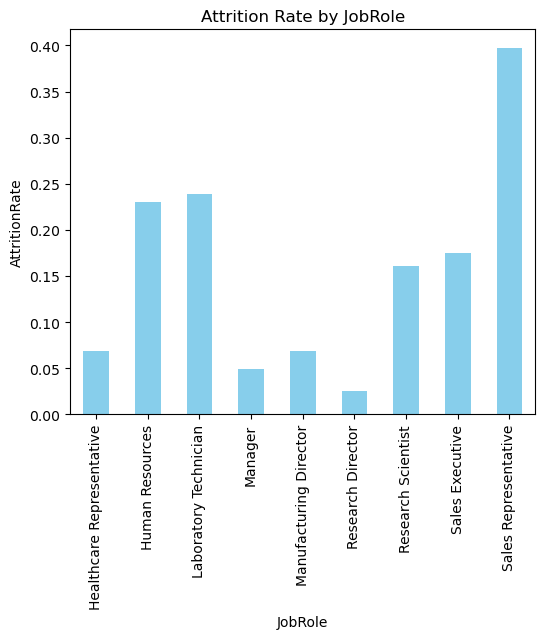

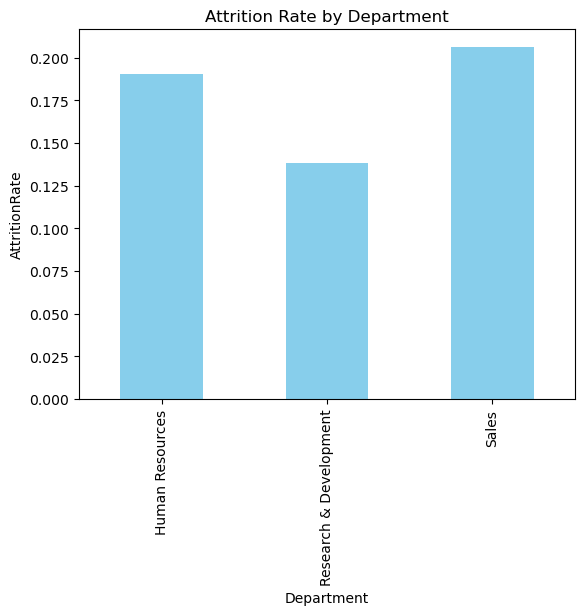

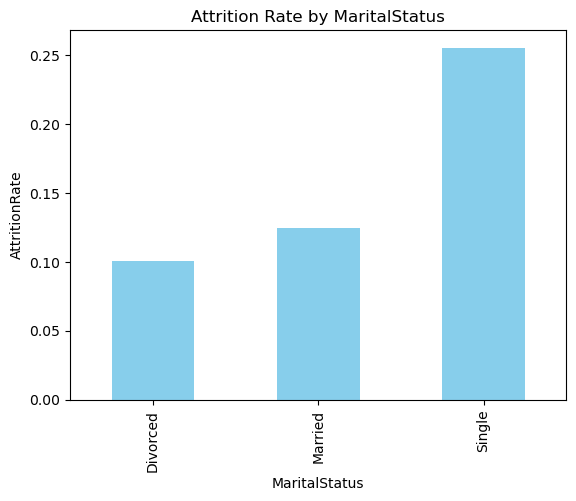

In [76]:
categorical_cols = ['JobRole','Department','MaritalStatus']

plt.figure(figsize =(6,5))
for i in categorical_cols:
    attrition_rate = df.groupby(i)['Attrition'].mean()
    attrition_rate.plot
    plt.ylabel('AttritionRate')
    plt.title(f'Attrition Rate by {i}')
    attrition_rate.plot(kind='bar',color = 'skyblue')
    plt.show()
               
    
    

### Bar Chart for Numerical_cols

In [78]:
numerical_cols = ['Monthly_Salary_Band','Age_Group','Distance_Band','Years_At_Company','Salary_Hike','JobSatisfaction']

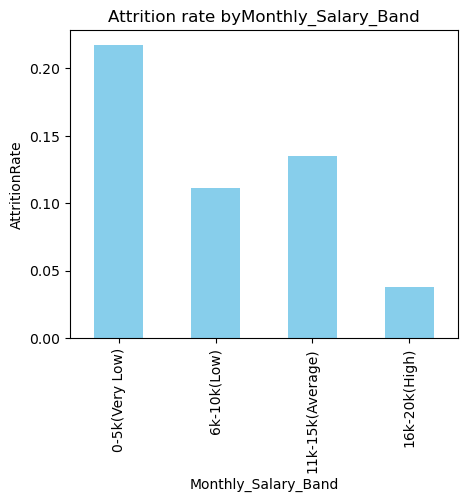

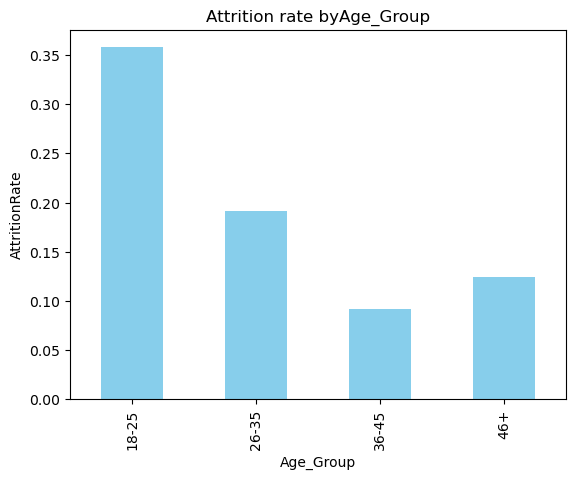

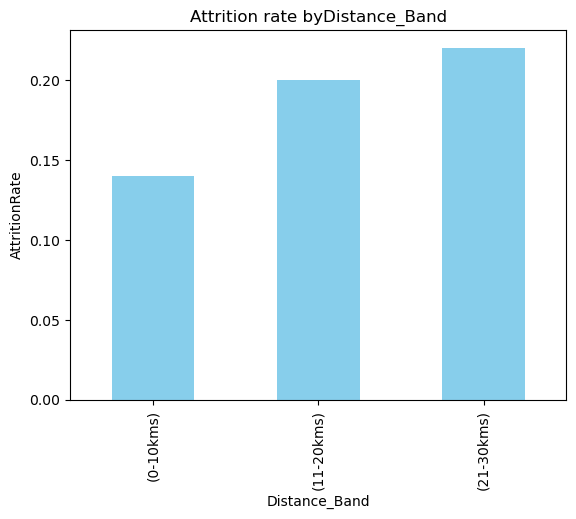

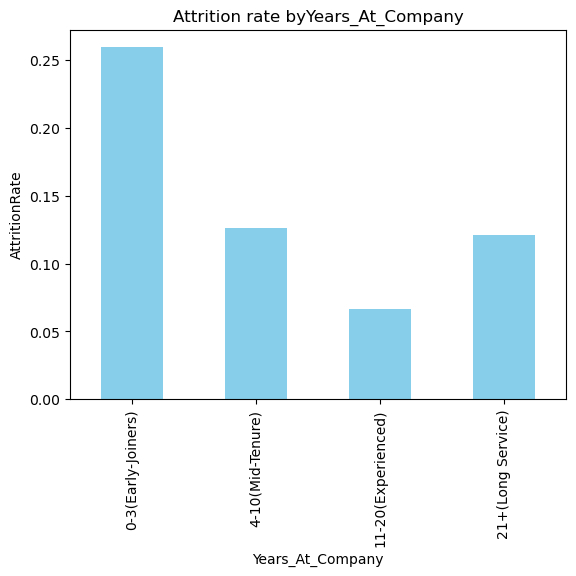

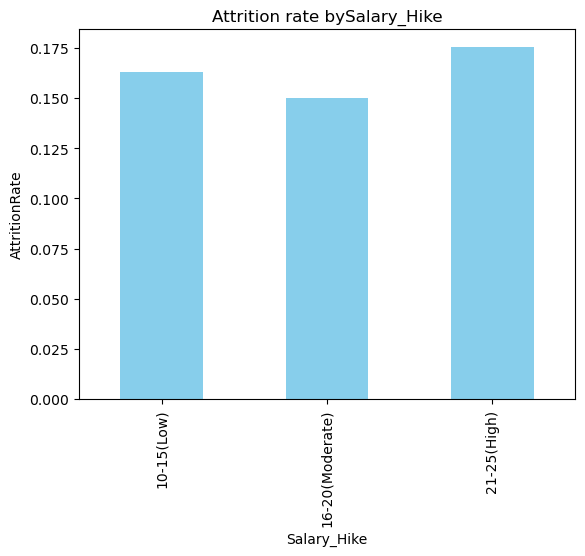

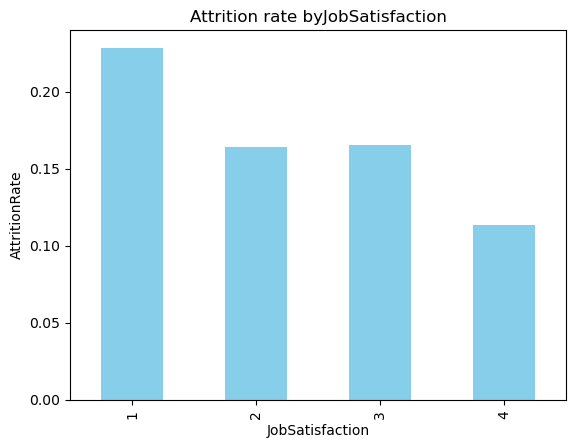

In [79]:
plt.figure(figsize = (5,4))
for i in numerical_cols:
    attrition_rate = df.groupby(i,observed=False)['Attrition'].mean()
    attrition_rate.plot
    plt.ylabel('AttritionRate')
    plt.title (f'Attrition rate by{i}')
    attrition_rate.plot(kind = 'bar',color= 'skyblue')
    plt.show()

In [80]:
### Interpretaion:

In [81]:
### Attrition % by Age_Group:

### Attrition is highest among the youngest employees and lowest among mid-career employees.
### HR should focus most retention efforts on the 18–35 age group, especially new hires.
### The organization appears to have a stable core workforce aged 36–45.

In [82]:
### Attrition % by Distance_Band :

### As commuting distance increases, attrition also increases.
### The difference between 14% and 22% is significant — indicating distance is a meaningful attrition factor.
### Employees with long commutes may benefit from:

#### Flexible work hours
#### Remote/Hybrid options
#### Transportation support
#### Shift adjustments
#### Local hiring strategies

In [83]:
### Attrition % by Monthly_Salary_Band 

### Attrition is highest in the lowest salary band and lowest in the highest salary band.
### Salary appears to be a major driver of employee retention.
### The drop from 21.76% → 3.76% shows a large and meaningful gap.

In [84]:
### Attrition % by Years_At_Company 

###  Early tenure employees (0–3 years) are the highest flight-risk group (25.96%).
### Attrition decreases steadily as tenure increases, hitting the lowest point at 11–20 years.
### Long-term employees (21+ years) show a slight attrition rebound, often due to retirement or career-end transitions.

In [85]:
### Attrition % by Promotion_Band

### Both ends of the promotion spectrum have higher attrition:
### Very recent promotions (role pressure, dissatisfaction).
### Very long gaps (career stagnation).
### Moderate promotion intervals (4–8 years) show the best retention.

In [86]:
### Attrition % by Salary_Hike

###  Moderate salary hikes (16–20%) result in the lowest attrition.
### Both low hikes and very high hikes show higher attrition, but for different reasons:
### Low hikes → dissatisfaction
### High hikes → high performers attracted externally or ambitious career moves
### This means salary hike % alone cannot retain people — it must be paired with career growth and role satisfaction.

In [87]:
### Attrition % by Job Role

### Sales roles (especially Sales Representatives) have the highest attrition — nearly 40%, showing a major retention problem.
### Technical and support roles like Laboratory Technicians and HR also show elevated attrition.
### Senior, managerial, and director-level roles have the lowest attrition, indicating long-term stability among experienced talent.
### There is a clear pattern:
### Lower pay + entry roles → high attrition
### Higher pay + senior roles → low attrition

In [88]:
### Attrition % by Department

### Sales and HR are high-attrition departments due to stress, workload, and job nature.
### R&D is the most stable department with the lowest attrition.
### The pattern aligns with earlier job-role-level insights.

In [89]:
### Attrition % by Gender

### Attrition difference between male (17.01%) and female (14.80%) employees is small (≈2.2%).
### This suggests that gender itself is not a major driver of attrition, but job role and department distribution likely explain most of the variation.
### There is no major gender imbalance in attrition — both groups behave similarly.

In [90]:
### Attrition % by Work Life Balance

### Poor WLB (rating = 1) strongly predicts attrition — 31% is extremely high.
###  Good WLB (rating = 3) has the lowest attrition, meaning employees stay when balance is healthy.
### Very high WLB (rating = 4) still shows moderate attrition, likely due to career growth expectations, not work conditions.

In [91]:
### Attrition % by Job Satisfaction

### Attrition is highest among employees with very low job satisfaction (22.84%)
### As job satisfaction improves, attrition decreases.
### The relationship is inverse — employees who are dissatisfied leave at much higher rates,
### indicating that improving job experience, role clarity, workload balance, and support can significantly reduce attrition.

### Overall Conclusion

In [184]:
### Employee attrition is mainly driven by job role, job satisfaction, work-life balance and departmental work pressures,
###  while factors like gender and salary hikes have relatively smaller effects.
### Roles that are high-stress, frontline, or have lower satisfaction and poor work-life balance show the highest attrition.

### Improving job satisfaction, work-life balance, and addressing issues in Sales, HR, and junior operational roles
### would significantly reduce employee turnover.

In [208]:
### Saving to Excel

In [210]:
df.to_excel('HR Project.xlsx',index=False)

In [212]:
df.to_csv('HR Project.csv',index=False)